<!-- Image labelled for garbage detection using polygons on cvat.ai website, and the corresponding annotation's xml file used to generate a 126x126 env map -->
Image labelled for garbage detection using polygons on cvat.ai website, and the corresponding annotation's xml file used to generate a 324x234 env map

In [1]:
import xml.etree.ElementTree as ET
import numpy as np
import cv2
from PIL import Image

In [17]:
# Step 1: Parse the XML File
# tree = ET.parse("annotations.xml")
tree = ET.parse("annotations_parking 2.xml")
root = tree.getroot()

In [18]:
# Image dimensions
# original_width = 320
# original_height = 240
original_width = 176
original_height = 236


# target_width = 126
# target_height = 126
# target_width = 324
# target_height = 234
target_width = 234
target_height = 324



In [19]:
# Scaling factors
scale_x = target_width / original_width
scale_y = target_height / original_height

In [20]:
# Initialize the environment map
env_map = np.zeros((target_height, target_width), dtype=np.uint8)

In [21]:
# Step 2: Extract and Scale Coordinates
for image in root.findall('image'):
    for polygon in image.findall('polygon'):
        points = polygon.attrib['points']
        points = points.split(';')
        scaled_points = []
        for point in points:
            x, y = map(float, point.split(','))
            x = int(x * scale_x)
            y = int(y * scale_y)
            scaled_points.append((x, y))
        
        # Convert to numpy array for filling the polygon
        scaled_points = np.array(scaled_points, dtype=np.int32)
        
        # Step 3: Fill the corresponding coordinates with ones
        cv2.fillPoly(env_map, [scaled_points], 1)

In [22]:
print(scaled_points)

[[ 41 266]
 [ 55 266]
 [ 64 270]
 [ 57 281]
 [ 44 278]]


In [23]:
print(env_map)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
print(env_map.shape)

(324, 234)


In [25]:
# Step 4: Save/Visualize the Environment Map
# Save as a numpy array
# np.save('envMap_cvatPolygon.npy', env_map)
# np.save('envMap_cvatPolygon_new.npy', env_map)
np.save('envMap_cvatPolygon_parking 2.npy', env_map)

In [26]:
# Optionally visualize the map
import matplotlib.pyplot as plt

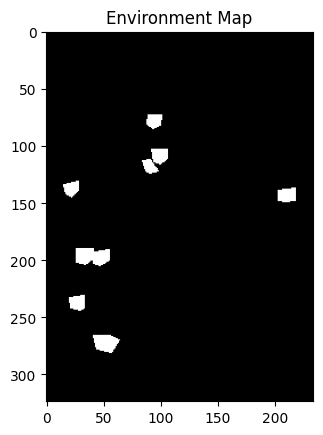

In [27]:
plt.imshow(env_map, cmap='gray')
plt.title('Environment Map')
plt.show()

In [28]:
# Save the environment map as an image for visualization (optional)
env_map_resized_img = Image.fromarray((env_map * 255).astype(np.uint8))
# env_map_resized_img.save('envMap_cvatPolygon.png')
# env_map_resized_img.save('envMap_cvatPolygon_new.png')
env_map_resized_img.save('envMap_cvatPolygon_parking 2.png')

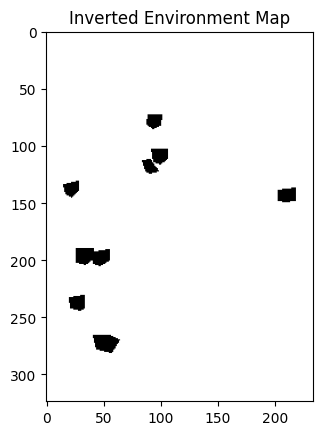

In [29]:
# Invert colors for visualization
inverted_env_map = 1 - env_map
plt.imshow(inverted_env_map, cmap='gray')
plt.title('Inverted Environment Map')
plt.show()
